# Pymaceuticals Inc.
---

### Analysis

- A statistical analysis of both Capomulin and Ramicane reveals both treatments had the lowest overall average tumor volumes as well as relatively low variance, standard deviation, and SEM. These results suggest Capomulin and Ramicane treatments were more effective and consistent than Infubinol and Ceftamin. In addition, the mortality rate of mice who underwent Capomulin and Ramicane were lower than the other drugs tested.
- There is also a strong, positive correlation (0.84) between mouse weight and tumor volume in mice undergoing treatment with Capomulin and Ramicane. Potentially, this correlation could indicate larger mice had better outcomes. I would be interested to see if this translates to humans. 
- Finally, there does not seem to be any correlation between mouse gender and tumor volume. 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how = "right")
combined_df=combined_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Checking the number of mice.
mice=combined_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
print(number_of_mice)

249


In [85]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = combined_df[combined_df[['Mouse ID', 'Timepoint']].duplicated()]['Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df['Mouse ID'].isin(mice_duplicate)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [88]:
# Checking the number of mice in the clean DataFrame.
number_mice = clean_df["Mouse ID"].value_counts()
clean_number_mice = len(number_mice)
print(clean_number_mice)

248


## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median =  clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance =  clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std =  clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem =  clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': mean,	
    'Median Tumor Volume': median,	
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
})

# Display summary statistics of DataFrame
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_statistics_aggregate=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])


# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregate


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

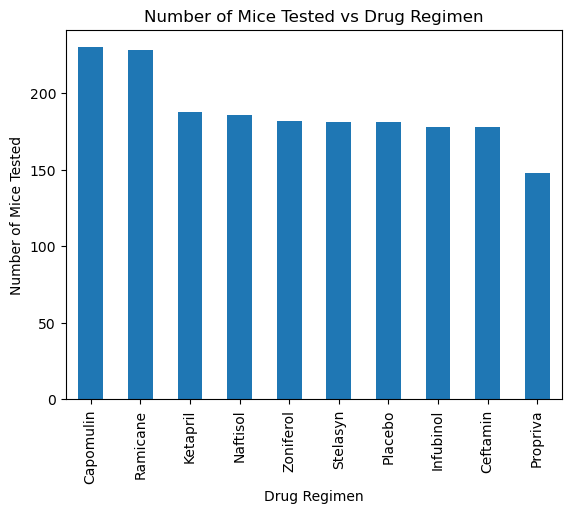

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_mice_count = clean_df['Drug Regimen'].value_counts().plot(kind = 'bar')

#Plot title
plt.title("Number of Mice Tested vs Drug Regimen")

#Label X and Y axis 
drug_mice_count.set_xlabel("Drug Regimen")
drug_mice_count.set_ylabel("Number of Mice Tested")

#Display plot
plt.show()

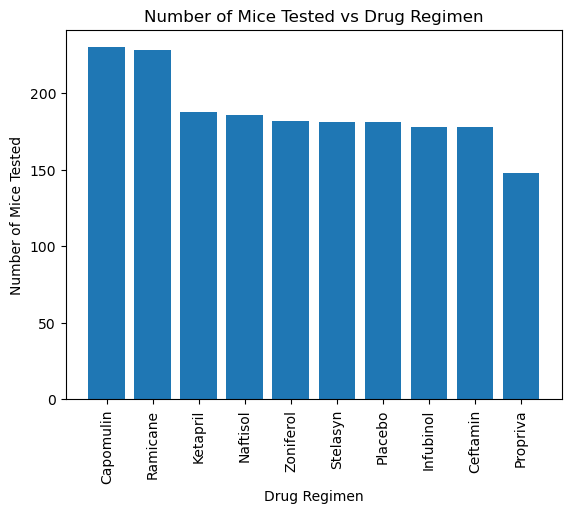

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_drug_mice_count = clean_df["Drug Regimen"].value_counts().to_dict()
plt.bar(pyplot_drug_mice_count.keys(), pyplot_drug_mice_count.values(), align = 'center')
plt.xticks(rotation = 90)

#Plot title
plt.title("Number of Mice Tested vs Drug Regimen")

#Label X and Y axis
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#Display plot
plt.show()

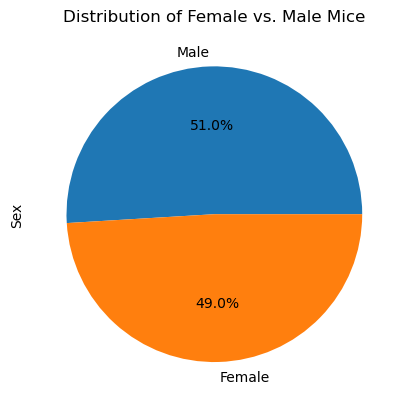

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_distribution = clean_df["Sex"].value_counts()
mouse_sex_distribution.plot(kind='pie', autopct='%1.1f%%')

#Plot title
plt.title("Distribution of Female vs. Male Mice")

#Display plot 
plt.show()

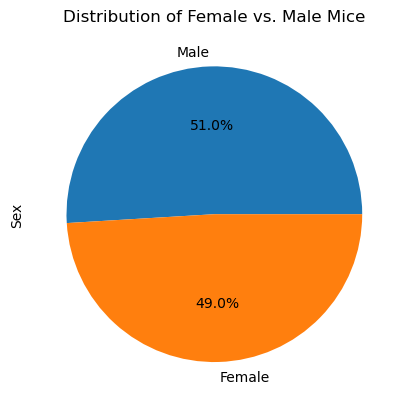

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex_distribution.index
sizes = mouse_sex_distribution.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")

#Plot title
plt.title("Distribution of Female vs. Male Mice")

# Display plot
plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = greatest_timepoint.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')

In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_loop_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_loop_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol_data = merge_df.loc[merge_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_vol_data)
    
    #Calculate IQR
    quartiles = final_vol_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol_data.loc[(final_vol_data>upper_bound) | (final_vol_data<lower_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


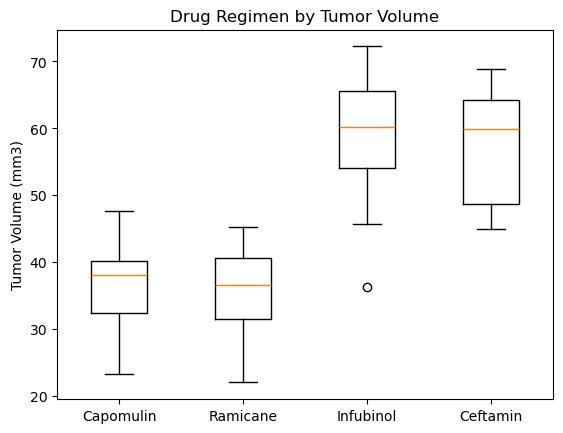

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatment_loop_list)

#Label x and y axis/title plot 
plt.ylabel("Tumor Volume (mm3)")
plt.title("Drug Regimen by Tumor Volume")

#Display plot 
plt.show()


## Line and Scatter Plots

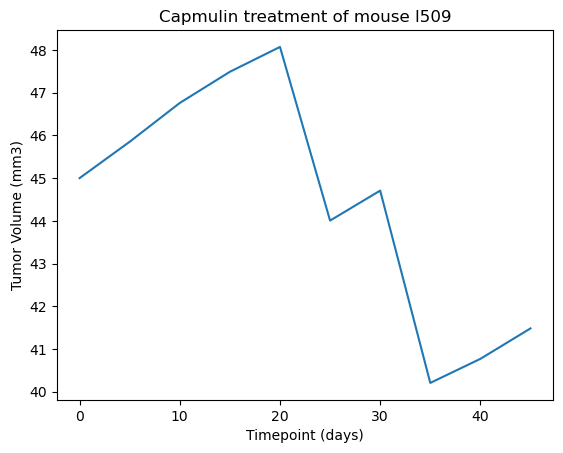

In [98]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_data = clean_df[clean_df['Mouse ID'] == 'l509']

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capmulin treatment of mouse l509')

# Display the plot
plt.show()

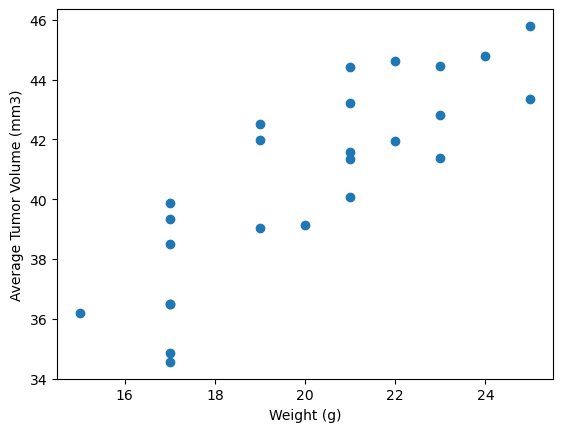

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']


# Calculate the average tumor volume for each mouse 
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean') 
)

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


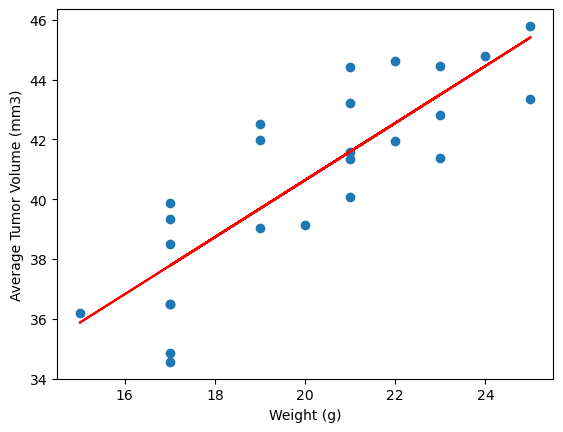

In [100]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])

# Calculate regression values
regress_values = average_tumor_volume['Weight'] * slope + intercept

# Create a scatter plot
plt.scatter(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])

# Plot the linear model on top of the scatter plot
plt.plot(average_tumor_volume['Weight'], regress_values, "r-")

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()